<a href="https://colab.research.google.com/github/asdas6da6sd/practicas/blob/master/Filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
path ='/content/drive/My Drive/prodim/'
os.chdir(path)
!pwd
%matplotlib inline

/content/drive/My Drive/prodim


In [0]:
def display4(a, b,c,d,title1 = "Original", title2 = "Edited", title3 = "Edited", title4 = "Edited"):
    plt.figure(figsize=(20,20))
    plt.subplot(141), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(142), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(143), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.subplot(144), plt.imshow(d,cmap='gray'), plt.title(title4)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [0]:
def displayGray2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


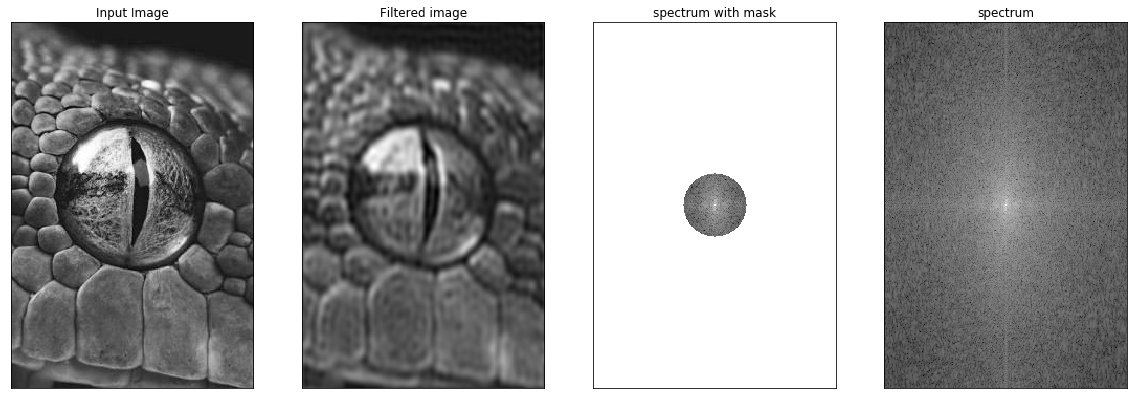

In [0]:
img = cv2.imread('ojo.jpg',0)
img_flotante = np.float32(img)
dft = cv2.dft(img_flotante,flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
fils,cols = img.shape
centfils,centcols = fils/2,cols/2

##crear mascara centro en unos resto en ceros

mask= np.ones((fils,cols,2),np.uint8)
r=30
center = [centfils,centcols]
x, y = np.ogrid[:fils,:cols]

mask= np.zeros((fils,cols,2),np.uint8)
mask_area = (x-center[0]) ** 2 + (y-center[1]) ** 2 <= r*r
mask[mask_area]=1
##mask[np.int32(centfils)-9 : np.int32(centfils)+9,np.int32(centcols)-9 : np.int32(centcols)+9]=0

##aplicar mascara y obtener inversa 

fshift = dft_shift*mask
fshift_mask_mag = 20*np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
display4(img,img_back,fshift_mask_mag,magnitude_spectrum,"Input Image", "Filtered image","spectrum with mask","spectrum")


Filtro de mediana


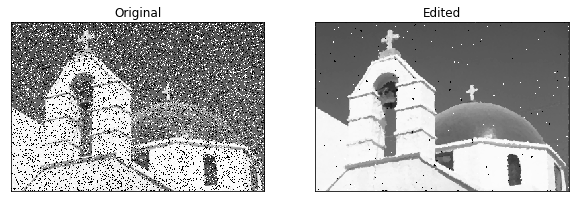

In [35]:
img = cv2.imread("saltlgle.png",0)
median = cv2.medianBlur(img,3)
displayGray2(img,median)



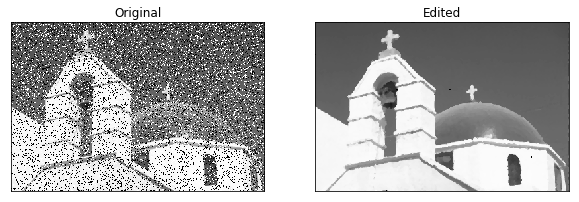

In [37]:

median2 = cv2.medianBlur(median,3)
displayGray2(img,median2)

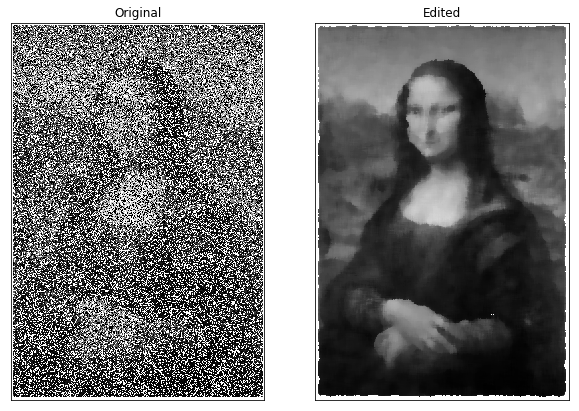

In [0]:
img = cv2.imread("saltpepper.png",0)
median = cv2.medianBlur(img,11)
displayGray2(img,median)

sharpening

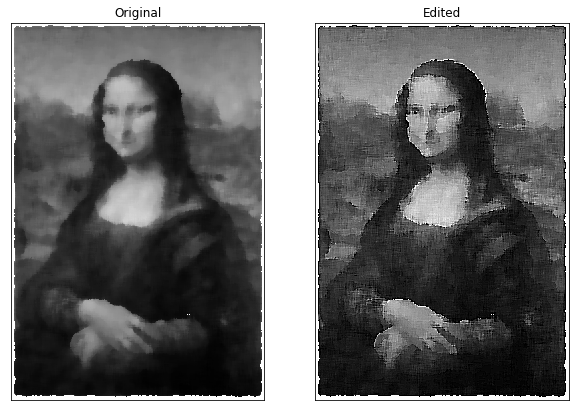

In [0]:
##img = cv2.imread("",0)
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
sharpened = cv2.filter2D(median,-1,kernel)
displayGray2(median,sharpened)


bilateral

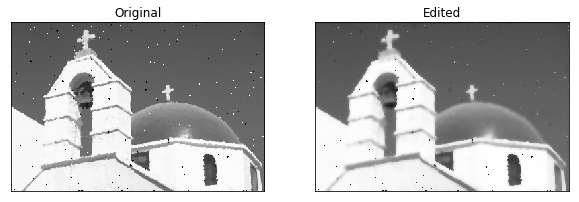

In [36]:
bilateral = cv2.bilateralFilter(median, 9,75,75)
displayGray2(median,bilateral)

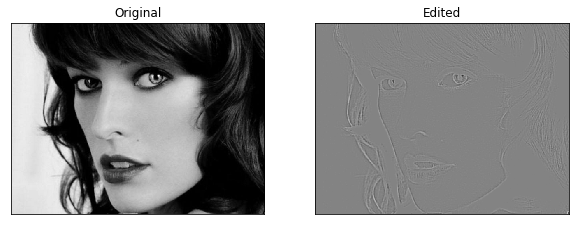

In [39]:
img = cv2.imread("resid.png",0)
lapl = cv2.Laplacian (img,cv2.CV_64F,ksize=5)
displayGray2(img,lapl)

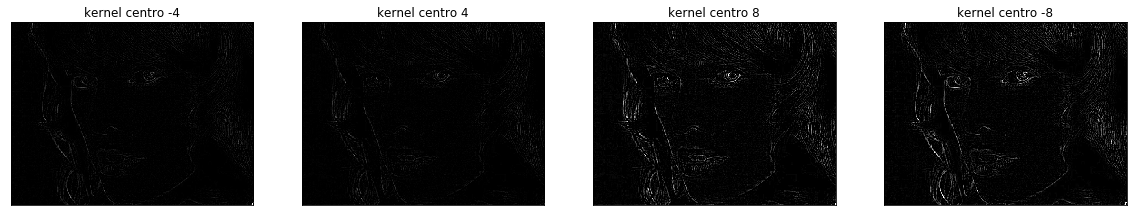

In [41]:
img = cv2.imread("resid.png",0)
kernel1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
kernel2 = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
kernel3 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kernel4 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
lapl1 = cv2.filter2D(img,-1,kernel1)
lapl2 = cv2.filter2D(img,-1,kernel2)
lapl3 = cv2.filter2D(img,-1,kernel3)
lapl4 = cv2.filter2D(img,-1,kernel4)
display4(lapl1,lapl2,lapl3,lapl4,"kernel centro -4", "kernel centro 4","kernel centro 8","kernel centro -8")


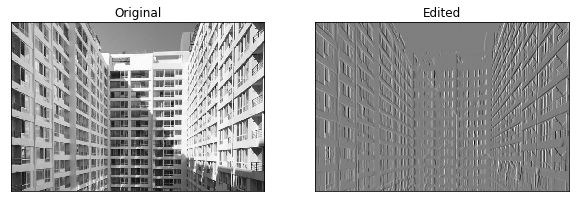

In [45]:
img = cv2.imread("edificios.jpg",0)
x_sobel = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
displayGray2(img,x_sobel)


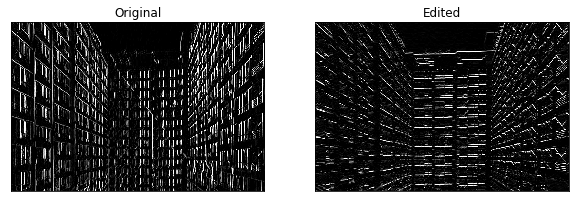

In [46]:
img = cv2.imread("edificios.jpg",0)
kernelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernely = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
diferx = cv2.filter2D(img,-1,kernelx)
difery = cv2.filter2D(img,-1,kernely)
displayGray2(diferx,difery)